# Python -09
## - Retrive Data from Alpha Vanitage 
https://www.alphavantage.co/documentation/

GET API KEY: WWD1GC9C8WI8PRW9

TIME_SERIES_INTRADAY --> Data of everyday, 1 minutes interval

TIME_SERIES_DAILY --> Daily data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import urllib.request # for requestion data via url
import json

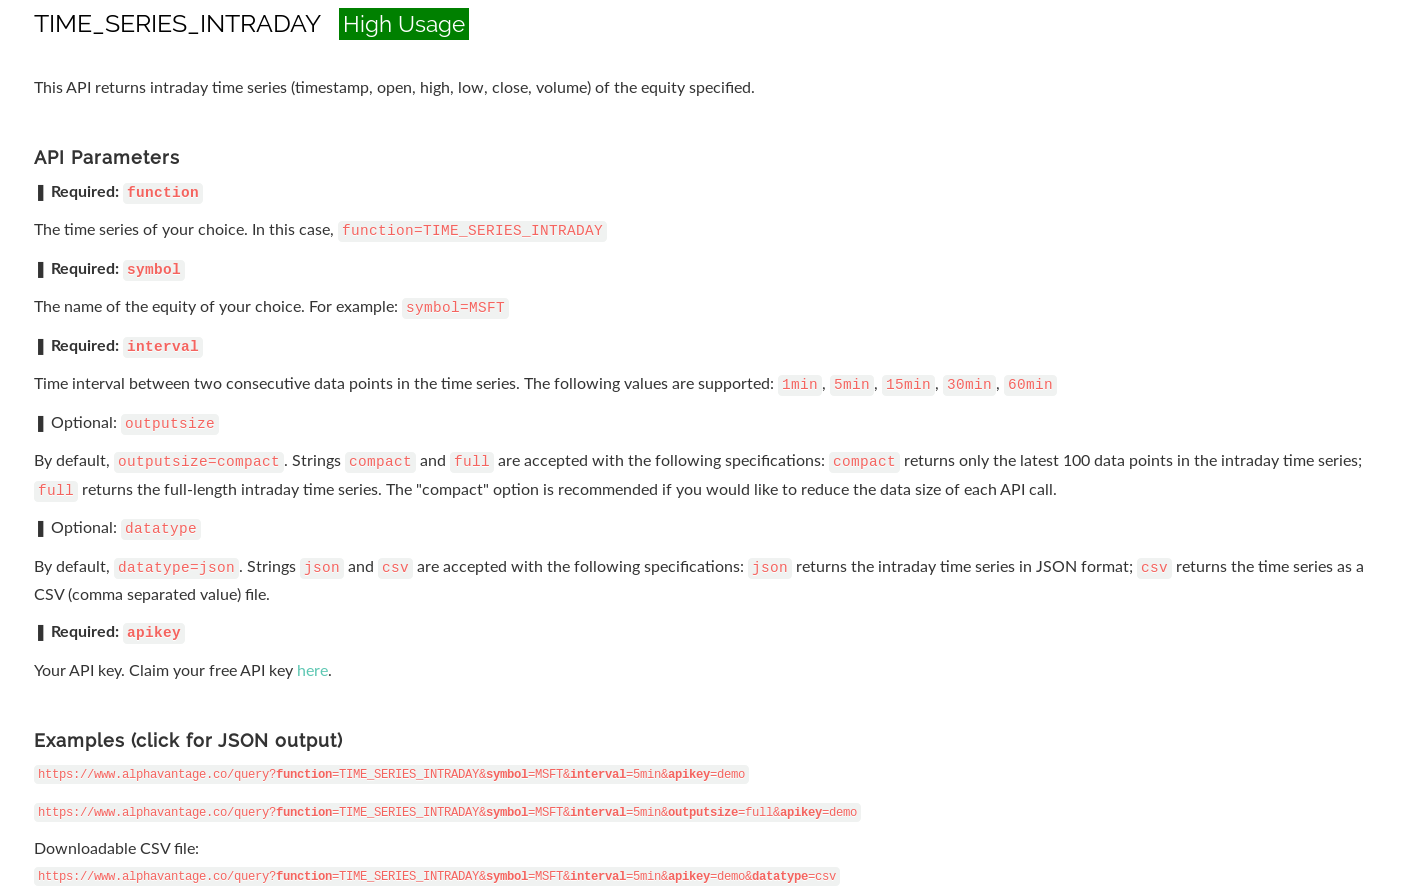

symbol --> stock code/ stock name

interval --> How long is the interval of data

outputsize --> size of file, compact = return the lastest 100 datas, full = all of the datas

datatype --> the data type, e.g. json, csv..etc

In [16]:
function = 'TIME_SERIES_INTRADAY'
symbol = 'AAPL'
interval = '1min'
outputsize = 'compact'
my_api = 'WWD1GC9C8WI8PRW9'
url = 'https://www.alphavantage.co/query?function=' + function +'&symbol='+ symbol+'&interval='+ interval +'&outputsize=' +outputsize +'&apikey='+ my_api
#print(url)
file = urllib.request.urlopen(url) # open the file via url
data = file.read()
js = data.decode('utf8') # data is in byte, have to decode to get String
file.close()
js

'{\n    "Meta Data": {\n        "1. Information": "Intraday (1min) open, high, low, close prices and volume",\n        "2. Symbol": "AAPL",\n        "3. Last Refreshed": "2018-10-29 13:43:00",\n        "4. Interval": "1min",\n        "5. Output Size": "Compact",\n        "6. Time Zone": "US/Eastern"\n    },\n    "Time Series (1min)": {\n        "2018-10-29 13:43:00": {\n            "1. open": "215.6300",\n            "2. high": "215.7600",\n            "3. low": "215.6300",\n            "4. close": "215.7600",\n            "5. volume": "34142"\n        },\n        "2018-10-29 13:42:00": {\n            "1. open": "215.8400",\n            "2. high": "215.8400",\n            "3. low": "215.6300",\n            "4. close": "215.6300",\n            "5. volume": "39511"\n        },\n        "2018-10-29 13:41:00": {\n            "1. open": "216.0500",\n            "2. high": "216.0800",\n            "3. low": "215.7900",\n            "4. close": "215.8300",\n            "5. volume": "27080"\n 

In [17]:
parse_data = json.loads(js) # change it into dictionary
parse_data

{'Meta Data': {'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
  '2. Symbol': 'AAPL',
  '3. Last Refreshed': '2018-10-29 13:43:00',
  '4. Interval': '1min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (1min)': {'2018-10-29 13:43:00': {'1. open': '215.6300',
   '2. high': '215.7600',
   '3. low': '215.6300',
   '4. close': '215.7600',
   '5. volume': '34142'},
  '2018-10-29 13:42:00': {'1. open': '215.8400',
   '2. high': '215.8400',
   '3. low': '215.6300',
   '4. close': '215.6300',
   '5. volume': '39511'},
  '2018-10-29 13:41:00': {'1. open': '216.0500',
   '2. high': '216.0800',
   '3. low': '215.7900',
   '4. close': '215.8300',
   '5. volume': '27080'},
  '2018-10-29 13:40:00': {'1. open': '216.1400',
   '2. high': '216.1400',
   '3. low': '216.0200',
   '4. close': '216.0800',
   '5. volume': '20592'},
  '2018-10-29 13:39:00': {'1. open': '216.0000',
   '2. high': '216.1100',
   '3. low': '215.8600',
   '4. close': 

In [18]:
print(type(parse_data))
print(parse_data.keys())

<class 'dict'>
dict_keys(['Meta Data', 'Time Series (1min)'])


In [31]:
ps = parse_data['Time Series (1min)']
# Dataframe from dict, orient make keys of dict to be columns or index
df = pd.DataFrame.from_dict(ps, orient = 'columns') #'column'
#df.columns  = ['Open','High','Low','Close','Volume']
df.head()

,2018-10-29 13:43:00,2018-10-29 13:42:00,2018-10-29 13:41:00,2018-10-29 13:40:00,2018-10-29 13:39:00,2018-10-29 13:38:00,2018-10-29 13:37:00,2018-10-29 13:36:00,2018-10-29 13:35:00,2018-10-29 13:34:00,...,2018-10-29 12:13:00,2018-10-29 12:12:00,2018-10-29 12:11:00,2018-10-29 12:10:00,2018-10-29 12:09:00,2018-10-29 12:08:00,2018-10-29 12:07:00,2018-10-29 12:06:00,2018-10-29 12:05:00,2018-10-29 12:04:00
1. open,215.6300,215.8400,216.0500,216.1400,216.0000,215.9600,216.1700,216.3750,216.1100,216.0900,...,215.9300,215.7600,215.8400,215.9309,215.8700,216.0700,216.1600,216.1400,215.9800,215.9400
2. high,215.7600,215.8400,216.0800,216.1400,216.1100,216.0200,216.1700,216.3750,216.3800,216.1000,...,216.1143,215.9100,215.8700,215.9900,216.0000,216.1300,216.2400,216.1900,216.1604,216.0100
3. low,215.6300,215.6300,215.7900,216.0200,215.8600,215.8300,215.8700,216.1400,216.1100,215.9700,...,215.9200,215.7600,215.7500,215.7700,215.7800,215.9100,215.9800,216.0100,215.9800,215.8700
4. close,215.7600,215.6300,215.8300,216.0800,216.1100,215.9400,215.9550,216.1800,216.3500,216.0900,...,216.0200,215.8700,215.7900,215.8000,215.9700,215.9300,215.9900,216.1800,216.1604,216.0000
5. volume,34142,39511,27080,20592,28401,22318,43660,30866,61223,34981,...,74022,52567,61183,69557,73300,104201,154400,84608,86140,66487


In [32]:
ps = parse_data['Time Series (1min)']
# Dataframe from dict, orient make keys of dict to be columns or index Default: columns
df = pd.DataFrame.from_dict(ps, orient = 'index') #'column'
df.columns  = ['Open','High','Low','Close','Volume']
df.head()

,Open,High,Low,Close,Volume
2018-10-29 12:04:00,215.9400,216.0100,215.8700,216.0000,66487
2018-10-29 12:05:00,215.9800,216.1604,215.9800,216.1604,86140
2018-10-29 12:06:00,216.1400,216.1900,216.0100,216.1800,84608
2018-10-29 12:07:00,216.1600,216.2400,215.9800,215.9900,154400
2018-10-29 12:08:00,216.0700,216.1300,215.9100,215.9300,104201


In [33]:
def import_data(function, symbol, interval, size, key_name, api):
    if function == 'TIME_SERIES_INTRADAY':
        url = 'https://www.alphavantage.co/query?function=' + function +'&symbol='+ symbol+'&interval='+ interval +'&outputsize=' +outputsize +'&apikey='+ my_api
    if function == 'TIME_SERIES_DAILY':
        url = 'https://www.alphavantage.co/query?function=' + function +'&symbol='+ symbol +'&outputsize=' +outputsize +'&apikey='+ my_api
    f = urllib.request.urlopen(url)
    dat = f.read()
    js = dat.decode('utf8')
    f.close()
    parse_data = json.loads(js)
    ps = parse_data[key_name]
    df = pd.DataFrame.from_dict(ps, orient = 'index') #'column'
    df.columns  = ['Open','High','Low','Close','Volume']
    return df

In [35]:
function = 'TIME_SERIES_DAILY'
symbol = 'AAPL'
interval = '1min'
size = 'compact'
key_name = 'Time Series (Daily)'
api = 'WWD1GC9C8WI8PRW9'

apple = import_data(function, symbol, interval, size, key_name, api)
apple.head()

,Open,High,Low,Close,Volume
2018-06-08,191.1700,192.0000,189.7700,191.7000,26656799
2018-06-11,191.3500,191.9700,190.2100,191.2300,18308460
2018-06-12,191.3850,192.6110,191.1500,192.2800,16911141
2018-06-13,192.4200,192.8800,190.4400,190.7000,21638393
2018-06-14,191.5500,191.5700,190.2200,190.8000,21610074


In [36]:
symbol = 'MSFT'
msft = import_data(function, symbol, interval, size, key_name, api)
msft.head()

,Open,High,Low,Close,Volume
2018-06-08,101.0924,101.9500,100.5400,101.6300,22165128
2018-06-11,101.3700,101.5900,100.6700,101.0500,23490894
2018-06-12,101.1000,101.4493,100.7500,101.3100,18325228
2018-06-13,101.7200,102.0100,100.5600,100.8500,29492875
2018-06-14,101.6500,102.0300,101.0000,101.4200,25691811


In [39]:
print(apple.iloc[0,0])
print(type(apple.iloc[0,0]))

191.1700
<class 'str'>


## - Apply
Turns those int or float in dataframe from String to numeric

In [40]:
df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], columns = ['A','B','C'])
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [41]:
import numpy as np
df.apply(np.sqrt) #apply() <-- will apply the function into each data of dataframe

,A,B,C
0,1.000000,1.414214,1.732051
1,2.000000,2.236068,2.449490
2,2.645751,2.828427,3.000000


In [42]:
df.apply(np.sum) #<-- apply for each columns 
# e.g. A= 1+4+7, B= 2+5+8, C= 3+6+9

A    12
B    15
C    18
dtype: int64

In [43]:
df.apply(np.sum, axis = 1) #<-- apply for each rows.
#e.g. [0]= 1+2+3, [1]= 4+5+6, [2]= 7+8+9

0     6
1    15
2    24
dtype: int64

In [44]:
df.apply(print)

0    1
1    4
2    7
Name: A, dtype: int64
0    2
1    5
2    8
Name: B, dtype: int64
0    3
1    6
2    9
Name: C, dtype: int64


A    None
B    None
C    None
dtype: object

In [45]:
df['A'].apply(print)

1
4
7


0    None
1    None
2    None
Name: A, dtype: object

In [46]:
def diff(x):
    return max(x)-min(x)  #<-- the maximun in x minus the minimun in x

In [47]:
df.apply(diff)

A    6
B    6
C    6
dtype: int64

In [48]:
df['A'].apply(diff) # <-- the function is for a set of number, not a single list of numbers

TypeError: 'int' object is not iterable

In [49]:
df['A'].map(np.sqrt)

0    1.000000
1    2.000000
2    2.645751
Name: A, dtype: float64

## map() v.s. apply()

map() is for Series (i.e. Single columns) and operates on one cell at a time

apply() is for DataFrame, and operates on a whole row at a time.

In [54]:
df.apply(lambda x: x+1) # lambda parameter: function

,A,B,C
0,2,3,4
1,5,6,7
2,8,9,10


In [56]:
print(df)
df[['A','B']] = df[['A','B']].apply(lambda x : x*2)  # change 2 columns of data
df

    A   B  C
0   2   4  3
1   8  10  6
2  14  16  9


,A,B,C
0,4,8,3
1,16,20,6
2,28,32,9


In [57]:
df.apply(lambda x: max(x)-min(x))

A    24
B    24
C     6
dtype: int64

#### Change those String in DataFrame into numeric

In [59]:
cols = apple.columns
# original : pd.to_numeric(x, errors= 'coerce')
# any parameter in function within apply() have to separete and type as below
apple[cols] = apple[cols].apply(pd.to_numeric, errors= 'coerce')
apple.index = pd.to_datetime(apple.index, format= '%Y-%m-%d')
apple.head()

,Open,High,Low,Close,Volume
2018-06-08,191.170,192.000,189.77,191.70,26656799
2018-06-11,191.350,191.970,190.21,191.23,18308460
2018-06-12,191.385,192.611,191.15,192.28,16911141
2018-06-13,192.420,192.880,190.44,190.70,21638393
2018-06-14,191.550,191.570,190.22,190.80,21610074


In [60]:
type(apple.iloc[0,0])

numpy.float64

In [61]:
def data_clean(df):
    cols = df.columns
    df[cols] = df[cols].apply(pd.to_numeric, errors= 'coerce')
    df.index = pd.to_datetime(df.index, format= '%Y-%m-%d')
    return df
msft

,Open,High,Low,Close,Volume
2018-06-08,101.0924,101.9500,100.5400,101.6300,22165128
2018-06-11,101.3700,101.5900,100.6700,101.0500,23490894
2018-06-12,101.1000,101.4493,100.7500,101.3100,18325228
2018-06-13,101.7200,102.0100,100.5600,100.8500,29492875
2018-06-14,101.6500,102.0300,101.0000,101.4200,25691811
2018-06-15,101.5100,101.5300,100.0700,100.1300,65738585
2018-06-18,100.0100,101.1100,99.4200,100.8600,23586037
2018-06-19,99.6500,101.0000,99.5000,100.8600,28653087
2018-06-20,101.3700,102.5200,101.1200,101.8700,26180792
2018-06-21,102.0750,102.4600,100.8800,101.1400,23198188


In [62]:
m = data_clean(msft)

In [64]:
function= 'TIME_SERIES_DAILY'
symbol_list= ['AAPL','MSFT','GOOG','FB']
interval= '1min'
outputsize= 'compact'
key_name= 'Time Series (Daily)'

stock_list= {}
for symbol in symbol_list:
    temp_dat= import_data(function, symbol, interval, outputsize, key_name, api)
    stock_list[symbol]= data_clean(temp_dat)

In [66]:
stock_list['FB']

,Open,High,Low,Close,Volume
2018-06-08,187.5300,189.4754,186.4300,189.10,12677092
2018-06-11,188.8100,192.6000,188.8000,191.54,12928907
2018-06-12,192.1700,193.2800,191.5600,192.40,11562704
2018-06-13,192.7400,194.5000,191.9100,192.41,15853821
2018-06-14,193.1000,197.2800,192.9100,196.81,19120866
2018-06-15,195.7900,197.0700,194.6400,195.85,21860931
2018-06-18,194.8000,199.5800,194.1300,198.31,16826023
2018-06-19,196.2352,197.9600,193.7900,197.49,19993996
2018-06-20,199.1000,203.5500,198.8050,202.00,28230933
2018-06-21,202.7600,203.3900,200.0900,201.50,19045717


## Excerise 1

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import urllib.request # for requestion data via url
import json

In [3]:
#################################################
#     get data from url, parsing it into dict   #
#################################################
function = 'TIME_SERIES_INTRADAY'
symbol = 'AAPL'
interval = '5min' # set the interval as 5mins
outputsize = 'compact'
my_api = 'WWD1GC9C8WI8PRW9'
url = 'https://www.alphavantage.co/query?function=' + function +'&symbol='+ symbol+'&interval='+ interval +'&outputsize=' +outputsize +'&apikey='+ my_api
#print(url)
file = urllib.request.urlopen(url) 
data = file.read()
js = data.decode('utf8') 
file.close()
parse_data = json.loads(js)

#########################################
#     Make dict into DataFrame          #
#########################################
ps = parse_data['Time Series (5min)']
apple= pd.DataFrame.from_dict(ps, orient = 'index')
apple.columns= ['Open','High','Low','Close','Volume']
apple.head()

,Open,High,Low,Close,Volume
2018-10-29 10:00:00,218.5700,219.1900,218.2000,219.0100,477785
2018-10-29 10:05:00,219.0150,219.4400,218.8000,219.2811,605325
2018-10-29 10:10:00,219.3150,219.6300,219.2200,219.6100,482562
2018-10-29 10:15:00,219.6242,219.6700,219.1500,219.1900,380642
2018-10-29 10:20:00,219.2150,219.4700,218.6900,218.7200,507070


## Excerise 2

In [4]:
#################################################
#     convert index into date and time format   #
#################################################
date= pd.to_datetime(apple.index, format= '%Y-%m-%d %H:%M:%S').date
time= pd.to_datetime(apple.index, format= '%Y-%m-%d %H:%M:%S').time

#########################################
#     Appending Date and Time columns   #
#########################################
apple['Date']= date
apple['Time']= time

####################################################
#     Change type(Volume) from String to numeric   #
####################################################
print('Before:', type(apple.iloc[0,4]))
apple['Volume'] = apple['Volume'].apply(pd.to_numeric, errors= 'coerce')
print('After:', type(apple.iloc[0,4]))
apple.head()

Before: <class 'str'>
After: <class 'numpy.int64'>


,Open,High,Low,Close,Volume,Date,Time
2018-10-29 10:00:00,218.5700,219.1900,218.2000,219.0100,477785,2018-10-29,10:00:00
2018-10-29 10:05:00,219.0150,219.4400,218.8000,219.2811,605325,2018-10-29,10:05:00
2018-10-29 10:10:00,219.3150,219.6300,219.2200,219.6100,482562,2018-10-29,10:10:00
2018-10-29 10:15:00,219.6242,219.6700,219.1500,219.1900,380642,2018-10-29,10:15:00
2018-10-29 10:20:00,219.2150,219.4700,218.6900,218.7200,507070,2018-10-29,10:20:00


## Excerise 3

#### pct_change()

In [5]:
apple['Volume_pct1']= apple['Volume'].pct_change()
apple.head()

,Open,High,Low,Close,Volume,Date,Time,Volume_pct1
2018-10-29 10:00:00,218.5700,219.1900,218.2000,219.0100,477785,2018-10-29,10:00:00,NaN
2018-10-29 10:05:00,219.0150,219.4400,218.8000,219.2811,605325,2018-10-29,10:05:00,0.266940
2018-10-29 10:10:00,219.3150,219.6300,219.2200,219.6100,482562,2018-10-29,10:10:00,-0.202805
2018-10-29 10:15:00,219.6242,219.6700,219.1500,219.1900,380642,2018-10-29,10:15:00,-0.211206
2018-10-29 10:20:00,219.2150,219.4700,218.6900,218.7200,507070,2018-10-29,10:20:00,0.332144


#### shift(-1) & shift(1)

shift(-1) up a row,

shift(1) down a row,

In [6]:
apple['Volume_pct2']= apple.Volume_pct1.shift(-1)
apple.head()

,Open,High,Low,Close,Volume,Date,Time,Volume_pct1,Volume_pct2
2018-10-29 10:00:00,218.5700,219.1900,218.2000,219.0100,477785,2018-10-29,10:00:00,NaN,0.266940
2018-10-29 10:05:00,219.0150,219.4400,218.8000,219.2811,605325,2018-10-29,10:05:00,0.266940,-0.202805
2018-10-29 10:10:00,219.3150,219.6300,219.2200,219.6100,482562,2018-10-29,10:10:00,-0.202805,-0.211206
2018-10-29 10:15:00,219.6242,219.6700,219.1500,219.1900,380642,2018-10-29,10:15:00,-0.211206,0.332144
2018-10-29 10:20:00,219.2150,219.4700,218.6900,218.7200,507070,2018-10-29,10:20:00,0.332144,-0.231686


In [7]:
apple['Volume_pct2']= apple.Volume_pct1.shift(1)
apple.head()

,Open,High,Low,Close,Volume,Date,Time,Volume_pct1,Volume_pct2
2018-10-29 10:00:00,218.5700,219.1900,218.2000,219.0100,477785,2018-10-29,10:00:00,NaN,NaN
2018-10-29 10:05:00,219.0150,219.4400,218.8000,219.2811,605325,2018-10-29,10:05:00,0.266940,NaN
2018-10-29 10:10:00,219.3150,219.6300,219.2200,219.6100,482562,2018-10-29,10:10:00,-0.202805,0.266940
2018-10-29 10:15:00,219.6242,219.6700,219.1500,219.1900,380642,2018-10-29,10:15:00,-0.211206,-0.202805
2018-10-29 10:20:00,219.2150,219.4700,218.6900,218.7200,507070,2018-10-29,10:20:00,0.332144,-0.211206


In [8]:
apple['Volume_pct2']= (apple.Volume - apple.Volume.shift(1)) / apple.Volume.shift(1)
apple.head()

,Open,High,Low,Close,Volume,Date,Time,Volume_pct1,Volume_pct2
2018-10-29 10:00:00,218.5700,219.1900,218.2000,219.0100,477785,2018-10-29,10:00:00,NaN,NaN
2018-10-29 10:05:00,219.0150,219.4400,218.8000,219.2811,605325,2018-10-29,10:05:00,0.266940,0.266940
2018-10-29 10:10:00,219.3150,219.6300,219.2200,219.6100,482562,2018-10-29,10:10:00,-0.202805,-0.202805
2018-10-29 10:15:00,219.6242,219.6700,219.1500,219.1900,380642,2018-10-29,10:15:00,-0.211206,-0.211206
2018-10-29 10:20:00,219.2150,219.4700,218.6900,218.7200,507070,2018-10-29,10:20:00,0.332144,0.332144


#### lambda

In [9]:
type(apple['Volume'])

pandas.core.series.Series

In [11]:
apple['Volume_pct3']= apple.loc[:, ['Volume']].apply(lambda x: x/x.shift(1)-1)
apple.head()

,Open,High,Low,Close,Volume,Date,Time,Volume_pct1,Volume_pct2,Volume_pct3
2018-10-29 10:00:00,218.5700,219.1900,218.2000,219.0100,477785,2018-10-29,10:00:00,NaN,NaN,NaN
2018-10-29 10:05:00,219.0150,219.4400,218.8000,219.2811,605325,2018-10-29,10:05:00,0.266940,0.266940,0.266940
2018-10-29 10:10:00,219.3150,219.6300,219.2200,219.6100,482562,2018-10-29,10:10:00,-0.202805,-0.202805,-0.202805
2018-10-29 10:15:00,219.6242,219.6700,219.1500,219.1900,380642,2018-10-29,10:15:00,-0.211206,-0.211206,-0.211206
2018-10-29 10:20:00,219.2150,219.4700,218.6900,218.7200,507070,2018-10-29,10:20:00,0.332144,0.332144,0.332144
